<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install sklearn pandas

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=1f8a41e74a2bcc13263b0bc88353c8b20cf1d7dd4af2890c93cd1c7b062663e9
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [2]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=3, average='micro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add( Dense(30, kernel_initializer = 'uniform', activation = 'relu'))
model.add( Dense(10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

In [8]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                5100      
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 3)                 33        
                                                                 
Total params: 7,273
Trainable params: 7,273
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 580, epochs = 3000,  validation_split=0.2)

Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 13ms/step - loss: 0.8945 - accuracy: 0.5450 - val_loss: 1.3077 - val_accuracy: 0.3927
Epoch 502/3000
34/34 [==============================] - 1s 15ms/step - loss: 0.8937 - accuracy: 0.5451 - val_loss: 1.2722 - val_accuracy: 0.4009
Epoch 503/3000
34/34 [==============================] - 0s 9ms/step - loss: 0.8911 - accuracy: 0.5478 - val_loss: 1.5855 - val_accuracy: 0.2911
Epoch 504/3000
34/34 [==============================] - 0s 6ms/step - loss: 0.8954 - accuracy: 0.5396 - val_loss: 1.3333 - val_accuracy: 0.3852
Epoch 505/3000
34/34 [==============================] - 0s 6ms/step - loss: 0.8967 - accuracy: 0.5403 - val_loss: 1.1579 - val_accuracy: 0.4846
Epoch 506/3000
34/34 [==============================] - 0s 6ms/step - loss: 0.8920 - accuracy: 0.5464 - val_loss: 1.2554 - val_accuracy: 0.4199
Epoch 507/3000
34/34 [==============================] - 0s 6ms/step - loss: 0.8927 - accuracy: 0.5

In [11]:
import matplotlib.pyplot as plt

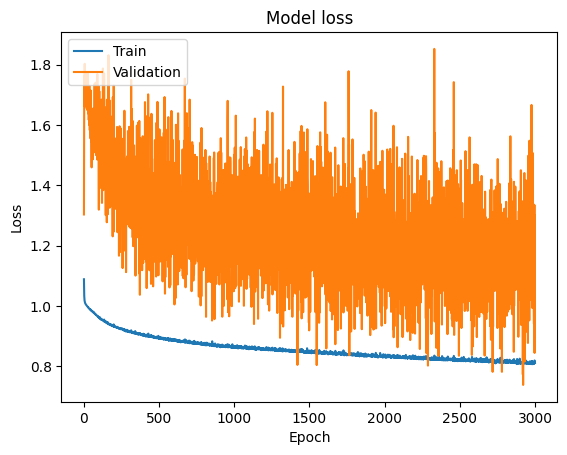

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

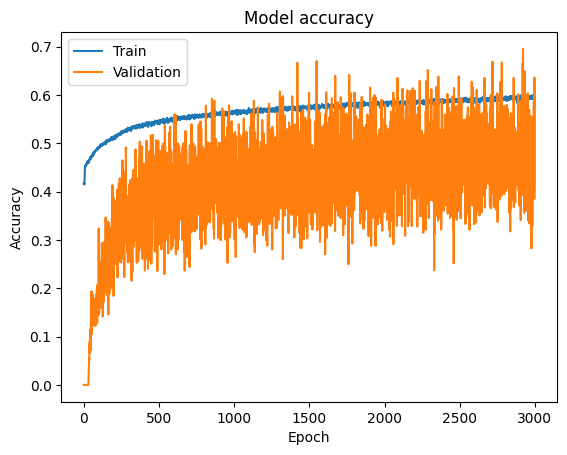

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 1.2389 - accuracy: 0.4046
[1.2388767004013062, 0.4045509099960327]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.52      0.43      0.47      2042
     class 1       0.30      0.47      0.37      1327
     class 2       0.43      0.22      0.30       806

    accuracy                           0.40      4175
   macro avg       0.42      0.38      0.38      4175
weighted avg       0.44      0.40      0.41      4175



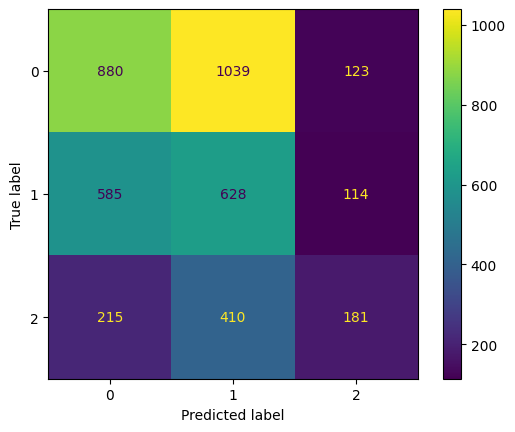



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 2ms/step - loss: 0.9126 - accuracy: 0.5565
[0.9125891327857971, 0.556549072265625]
766/766 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.56      0.55      0.55      8164
     class 1       0.47      0.74      0.57      8164
     class 2       0.88      0.38      0.53      8164

    accuracy                           0.56     24492
   macro avg       0.64      0.56      0.55     24492
weighted avg       0.64      0.56      0.55     24492



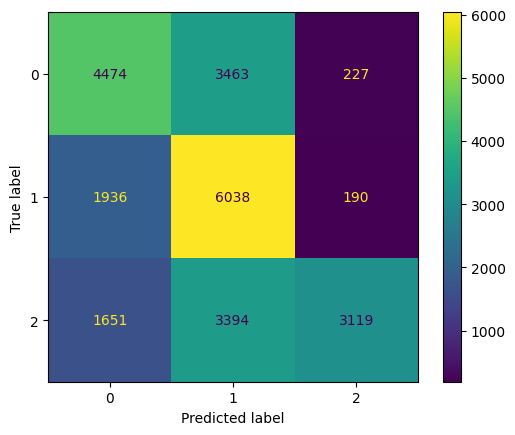

In [14]:
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 2ms/step - loss: 1.2389 - accuracy: 0.4046
